In [8]:
import qutip as qt
import numpy as np

In [14]:
1j*1j

(-1+0j)

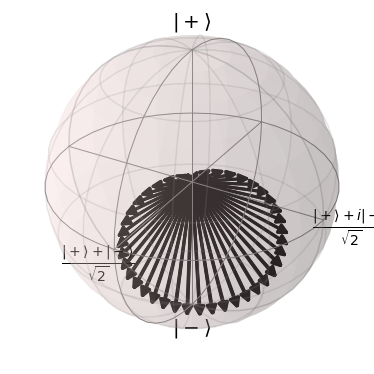

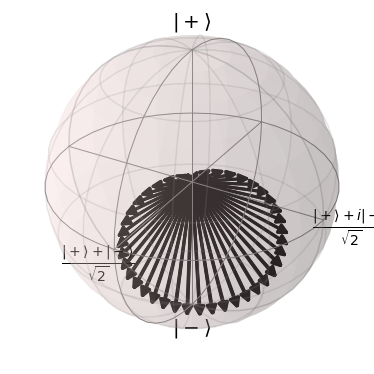

In [50]:
#macierze pauliego
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()


#stany bazowe
plus = qt.basis(2,0)  #|+>
minus = qt.basis(2,1)  #|->

#upiększanie sfery blocha
bloch = qt.Bloch()
bloch.zlabel = [r"$|+\rangle$",r"$|-\rangle$"]
bloch.xlabel = [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$",""]
bloch.ylabel = [r"$\frac{|+\rangle+i|-\rangle}{\sqrt{2}}$",""]
bloch.vector_color = ['k']
#sphere.point_color = ['w']
#sphere.point_marker = "o"

#stan poczatkowy cos(th/2)*|+> + sin(th/2)*e^{i phi}|->
th0 = np.pi/2
phi0 = 0
stan0 = np.cos(th0/2)*plus + np.sin(th0/2)*np.exp(1j*phi0)*minus
bloch.add_states(stan0)
bloch.show()

#Ewolucja
bx = 1; by = 0.7; bz = 0
H = bx*sx+by*sy+bz*sz   #Hamiltonian
tlist = np.linspace(0,2*np.pi,101)
res = qt.mesolve(H,stan0,tlist)



#rysujemy
for stan in res.states:
    bloch.add_states(stan)
    continue
bloch.show()


In [32]:
res.states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70710678+0.j ]
  [0.5       +0.5j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70571148-0.04439948j]
  [0.4676182 +0.53040854j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70153106-0.08862374j]
  [0.43339093+0.55872382j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.69458204-0.13249824j]
  [0.39745327+0.58483408j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.68489184-0.17584983j]
  [0.35994706+0.60863628j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.6724987-0.21850743j]
  [0.3210203+0.63003648j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.65745153-0.26030269j]
  [0.28082664+0.64895023j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.63980971-0.

In [10]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

In [11]:
plus = qt.basis(2,0); 
minus = qt.basis(2,1);
sz = qt.sigmaz(); sx = qt.sigmax(); sy = qt.sigmay()
om = 1
psi0 = (plus + minus).unit()
times = np.linspace(0,2*np.pi,81)
H = sz*om/2
res = qt.mesolve(H,psi0,times)
states = [state for state in res.states]
x = [qt.expect(sx,state) for state in res.states]

0.9876884475550337


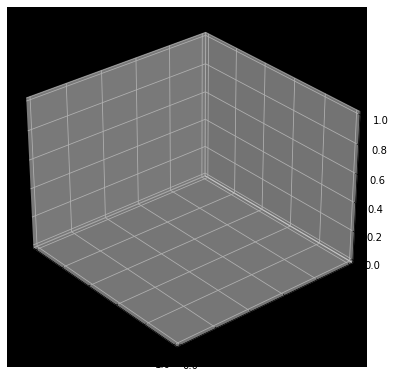

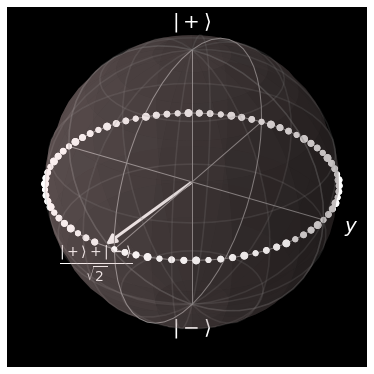

In [12]:
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D
print(qt.expect(sx,states[2]))
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig, azim=-40, elev=30)
plt.rcParams['axes.facecolor']='k'
sphere = qt.Bloch()
sphere.zlabel= ["|+>","|->"]
sphere.font_color="w"

def animate(i):
    sphere.clear()
    sphere.add_states(states[i])
    for k in range(i):
        sphere.add_points([qt.expect(sx,states[k]),qt.expect(sy,states[k]),qt.expect(sz,states[k])])
    sphere.make_sphere()
    return ax

def init():
    sphere.vector_color = ['w']
    sphere.point_color = ['w']
    sphere.point_marker = "o"
    sphere.zlabel= [r"$|+\rangle $",r"$|-\rangle$"]
    sphere.xlabel= [r"$\frac{|+\rangle+|-\rangle}{\sqrt{2}}$ ",""]
    sphere.font_color="w"
    
    return ax
ani = animation.FuncAnimation(fig, animate,init_func=init, frames=len(states)-1,repeat=False)

ani.save('mymovie.gif',fps=20)


In [42]:
states[2]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.69840116-0.11061563j]
 [0.69840116+0.11061563j]]